<a href="https://colab.research.google.com/github/kanjamwingirwa/Olist/blob/kanja/Olist_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import warnings
import plotly.express as px
warnings. filterwarnings("ignore")

Read, Review and Clean each dataset at a time. 

Customer Dataset

In [2]:
#Let us begin by loading the datasets
customer_df = pd.read_csv('/content/olist_customers_dataset.csv')
customer_df.head(5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [26]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


There seems to be no null values in the customer dataset. 

In [27]:
#We then have to change the postal code to string as it doesn't have a numerical bearing
customer_df['customer_zip_code_prefix']=customer_df['customer_zip_code_prefix'].astype(str)
customer_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [28]:
#lets capitalize the first letter of the cities
customer_df['customer_city'] = customer_df.customer_city.str.title() 

In [29]:
customer_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


In [30]:
#lets look at the data types
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


Items DataSet

In [31]:
order_items_df = pd.read_csv('//content/olist_order_items_dataset.csv')
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [32]:
#lets check for null values and check for null values
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


No null values in the order_items_df

In [33]:
#lets change the shipping_limit_date to from object date_time
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], dayfirst=True)
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [34]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Orders Dataset

In [3]:
#Let us begin by loading the datasets
orders_df = pd.read_csv('/content/olist_orders_dataset.csv')
orders_df.head(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
#lets change the order_purchase_timestamo to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], dayfirst=True)
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
#we delete these specific columns because we assume that they are NaN because the customer cancelled the order. As seen they are all equal/ 
orders_df = orders_df.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [16]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


Reviews Table

In [5]:
reviews_df = pd.read_csv('/content/olist_order_reviews_dataset.csv')
reviews_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [5]:
#lets delete the two columns with numerous null values
reviews_df = reviews_df.drop(['review_comment_title', 'review_comment_message'], axis=1)

In [6]:
#lets check to see if it has been implemented
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Sellers Table

In [7]:
sellers_df = pd.read_csv('/content/olist_sellers_dataset.csv')
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [85]:
#lets capitalize the first letter of the cities
sellers_df['seller_city'] = sellers_df.seller_city.str.title() 

In [86]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [87]:
#We then have to change the postal code to string as it doesn't have a numerical bearing
sellers_df['seller_zip_code_prefix']=sellers_df['seller_zip_code_prefix'].astype(str)
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [88]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


Payments Table

In [9]:
payments_df = pd.read_csv('/content/olist_order_payments_dataset.csv')
payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


No cleaning needed here. 

GeoLocation DataSet

In [23]:
geolocation_df = pd.read_csv('/content/olist_geolocation_dataset.csv')
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [24]:
#We then have to change the postal code to string as it doesn't have a numerical bearing
geolocation_df['geolocation_zip_code_prefix']=geolocation_df['geolocation_zip_code_prefix'].astype(str)
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [25]:
#lets capitalize the first letter of the cities
geolocation_df['geolocation_city'] = geolocation_df.geolocation_city.str.title() 
geolocation_df.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,Tapejara,RS
1000159,99900,-27.877125,-52.224882,Getulio Vargas,RS
1000160,99950,-28.071855,-52.014716,Tapejara,RS
1000161,99980,-28.388932,-51.846871,David Canabarro,RS
1000162,99950,-28.070104,-52.018658,Tapejara,RS


Products Table

In [11]:
product_df = pd.read_csv('/content/olist_products_dataset.csv')
product_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
#lets correct the spellings in the products table
dict = {'product_name_lenght': 'product_name_length',
        'product_description_lenght': 'product_description_length'}

In [13]:
#products_df
product_df.rename(columns=dict,
          inplace=True) 

In [14]:
product_df.head(5)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [16]:
#if product_category_name is missing we fill it with not categorized
product_df['product_category_name'] = product_df['product_category_name'].fillna('Not Categorized')

In [17]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [18]:
#relace the rest of the df with 0
product_df = product_df.fillna(0)

In [19]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32951 non-null  float64
 3   product_description_length  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [20]:
product_translation_df = pd.read_excel('/content/product_category_name_translation.xlsx')
product_translation_df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [21]:
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


No null values here 

In [22]:

datasets = [customer_df, geolocation_df, order_items_df, payments_df, reviews_df, orders_df, product_df, sellers_df, product_translation_df]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col in data.columns ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [data.duplicated().sum() for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')
     

NameError: ignored

There are no null values in the dataset. We also have some duplicate values but this is to be expected since many people can buy the same product.

Research Questions

What is the total revenue generated by Olist, and how has it changed over time?

In [44]:
#to see how revenues change over time we need to merge payments_df with orders_df
combined_df = pd.merge(payments_df,orders_df,on='order_id')
combined_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17


In [45]:
#to get total revenue we shall use the payments df
total_payments = payments_df['payment_value'].sum()
print(total_payments)

16008872.12


In [46]:
delivered_payments = combined_df[combined_df['order_status']== 'delivered']['payment_value'].sum()

In [47]:
print(delivered_payments)

15422461.77


The total revenue shoulld be 16008872.12 but with cancelled orders it now stands at $15422461.77

In [48]:
# Filter all rows for which the order was delivered
combined2_df = combined_df[combined_df['order_status'] == 'delivered']
 
# Print the new dataframe
combined2_df.head(5)
 


,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17


In [49]:
# Rename date column and separate into year, month, day etc
combined2_df['Date'] = pd.to_datetime(combined_df['order_purchase_timestamp'])
combined2_df['Year'] = combined_df['Date'].dt.year
combined2_df['Month'] = combined_df['Date'].dt.month
combined2_df['DayOfWeek']  = combined_df['Date'].dt.day_name()

KeyError: ignored

In [ ]:
combined2_df.head()

In [ ]:
#lets remove the original order_purchase_timestamp for a cleaner df
#combined2_df = combined2_df.drop(['order_purchase_timestamp'], axis=1)
combined2_df.head(5)

In [ ]:
combined2_df.info()

In [ ]:
changes = pd.DataFrame(combined2_df.groupby([combined2_df.Date.dt.year])['payment_value'].sum())
changes
     

In [ ]:
changes.sort_values('Date').plot(kind='bar', title = 'Revenue Changes 2016-2018');

2016 had the least sales but this increased as time went on

In [ ]:
from calendar import month_name

In [ ]:
months = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']

In [ ]:
combined2_df.groupby(combined_df['Date'].dt.strftime('%B'))['payment_value'].sum().reindex(months).plot.bar(figsize=(20,10))

Cumulatively, May was the month that most sales were made. 

In [ ]:
Months_of_the_Year = combined2_df[['Month','Year','payment_value']]
Months_of_the_Year = pd.DataFrame(Months_of_the_Year.groupby(['Year','Month'])['payment_value'].sum()).sort_index()
Months_of_the_Year.sort_values(by=['Year','Month','payment_value']).sort_index()
#Months_of_the_Year.sort_index(key=lambda x: pd.to_datetime(x, format="%B"))

In [ ]:
#combined_df.sort_values(by=['Date','payment_value'], ascending=True).plot(kind='bar')
#onths_of_the_Year.sort_values(by=['Year','payment_value'], ascending=True)
Months_of_the_Year.plot(kind='bar', title = 'Revenue Trend across the Months');

November 2017 is the month when most sales were made. 

How many orders were placed on Olist, and how does this vary by month or season? To answer this question, we only focus on the orders dataset.

In [ ]:
#let's preview the dataset now
orders_df.head(5)

In [ ]:
orders_df.info()

In [ ]:
orders_df['order_id'].nunique()

99,441 oders were placed on Olist

In [ ]:
# Rename date column and separate into year, month, day etc
orders_df['Date'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['Year'] = orders_df['Date'].dt.year
orders_df['Month'] = combined_df['Date'].dt.month
orders_df['DayOfWeek']  = combined_df['Date'].dt.day_name()

In [ ]:
orders_per_year = pd.DataFrame(orders_df.groupby([orders_df.Date.dt.year])['order_id'].count())
orders_per_year

In [ ]:
orders_per_year.plot(kind='bar', title='Orders Made Over the Years(2016-18)')

In [ ]:
orders_df.head()

In [ ]:
orders_df['Month'].value_counts().sort_values().plot(kind='bar', xlabel='Month', ylabel='Number of Entries', title='Monthly Orders Placed Cumulatively')

Cumulatively, August is the month when most orders were made.

In [ ]:
Months_of_the_Year = orders_df[['Month','Year','order_id']]
Months_of_the_Year = pd.DataFrame(Months_of_the_Year.groupby(['Year','Month'])['order_id'].count())
Months_of_the_Year.sort_values(by=['Year','Month','order_id'])

In [ ]:
Months_of_the_Year.plot(kind='bar')

It is interesting to note that the orders were made from January 2016 but sales actually began in October since it seems all the orders were cancelled. The most orders were done in 2018 August

In [ ]:
#to check if Jan 2016 had orders made
df2 = orders_df[(orders_df['Year'] == 2016) & (orders_df['Month'] == 1.0)]
df2.head(3) 

This is to confirm that indeed orders were placed in January, 2016

In [ ]:
orders_df['DayOfWeek'].value_counts().sort_values().plot(kind='bar', xlabel='Month', ylabel='Number of Entries', title='Orders by Day')

Shockingly, most orders were made on Monday. Momentum to make orders decreased as the week went on. What could be the reason for this?

What are the most popular product categories on Olist, and how do their sales volumes compare to each other?

To achieve this we will merge the order_items_df with products_df in order to cateogirze various orders in their categories

In [ ]:
order_items_df.head(2)

In [ ]:
#to merger order_items_df with payements_df
popular_df = pd.merge(product_df,order_items_df,on='product_id')
popular_df.head(5)

In [ ]:
popular_df.info()

In [ ]:
total_products = popular_df['product_id'].nunique()
print(total_products)

In [ ]:
total_products_categories = popular_df['product_category_name'].nunique()
print(total_products_categories)

There were 32951 unique products sold and they all fall in 74 categories. There are actually 73 categories but the extra one is 'uncategorized'.

In [ ]:
#we still have to merge with category translation in order to get the English version
popular_df = pd.merge(popular_df,product_translation_df,on='product_category_name')
popular_df.head(5)

In [ ]:
top_10 = (popular_df['product_category_name_english'].value_counts()).iloc[:10]
print(top_10)

In [ ]:
#create bar chart to visualize top 10 values
top_10.plot(kind='bar', title = 'Top 10 Popular Products')

Bed bath table is the most popular product category

In [ ]:
bottom_10 = (popular_df['product_category_name_english'].value_counts()).iloc[-10:]
print(bottom_10)

In [ ]:
bottom_10.plot(kind='bar', title = 'Ten Least Popular Categories')

In [ ]:
#top_10 products by sales
top_10_sales = pd.pivot_table(
   popular_df,
   index=['product_category_name_english'],
   aggfunc={'price': np.sum,}
).sort_values(['price'],  ascending=[False]).iloc[:10]
print(top_10_sales)

In [ ]:
#create bar chart to visualize top 10 values
top_10_sales.plot(kind='bar', title= 'Most popular Products by Sales')

In [ ]:
#bottom_10 popular products by Sales
bottom_10_sales = pd.pivot_table(
   popular_df,
   index=['product_category_name_english'],
   aggfunc={'price': np.sum,}
).sort_values(['price'],  ascending=[False]).iloc[-10:]
print(bottom_10_sales)
     

In [ ]:
#create bar chart to visualize top 10 values
top_10_sales.plot(kind='bar', title= ' Least popular Products by Sales')

While bed_bath_table are the most sold in terms of sheer numbers, they are not the ones selling most in terms of sales. However, most of the items in top 10 for both sales and number remain generally the same

**What is the average order value (AOV) on Olist, and how does this vary by product category or payment method?**

In [ ]:
#Average_Order_Value
Average_Order_Value = popular_df["price"].mean()
print(Average_Order_Value)

The average order value for an order on Olist is $120.74

In [ ]:
#to valculate the average sales per category
mean_by_category = popular_df.groupby(['product_category_name_english'])['price'].mean()
print(mean_by_category)

In [ ]:
#top_10_average_sales_wrt_category
top_10_aov_sales = pd.pivot_table(
   popular_df,
   index=['product_category_name_english'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[:10]
print(top_10_aov_sales)

In [ ]:
#create bar chart to visualize top 10 values
top_10_aov_sales.plot(kind='bar', title='Product Categories with the Highest Average Sales')

In [ ]:
#bottom_aov per wrt product category
bottom_10_aov_sales = pd.pivot_table(
   popular_df,
   index=['product_category_name_english'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[-10:]
print(bottom_10_aov_sales)


In [ ]:
#create bar chart to visualize bottom 10 values
top_10_aov_sales.plot(kind='bar', title='Product Categories with the Lowest Average Sales')

Expensive things do not have the highest volumes

In [ ]:

#lets drop a few columns from popular_df

new_df = popular_df.drop(['product_name_length',	'product_description_length',	'product_photos_qty',	'product_weight_g',	'product_length_cm',	'product_height_cm', 'product_width_cm'	], axis=1)
new_df.head(5)
     

In [ ]:
new_df = new_df.drop(['seller_id',	'order_item_id',	'shipping_limit_date',	'freight_value'], axis=1)
new_df.head(5)

In [ ]:
#lets merge the new_df with payment_df
newest_df = pd.merge(payments_df,new_df,on='order_id')
newest_df.head(5)

In [ ]:
top_10_payment_type_average_sales = pd.pivot_table(
   newest_df,
   index=['payment_type'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[:10]
print(top_10_payment_type_average_sales)

Credit card was the highest when it comes to average sales

In [ ]:
#top_10_payment_type_average_sales_per_category
top_10_payment_type_average_sales_per_category = pd.pivot_table(
   newest_df,
   index=['payment_type', 'product_category_name_english'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[:10]
print(top_10_payment_type_average_sales_per_category)

The average sales brought in by computers for the customers who paid by voucher were the highest

In [ ]:
#bottom_10_payment_type_average_sales_per_category
bottom_10_payment_type_average_sales_per_category = pd.pivot_table(
   newest_df,
   index=['payment_type', 'product_category_name_english'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[-10:]
print(bottom_10_payment_type_average_sales_per_category)

The average Sales from home_comfort_2 by voucher were the lowest

**How many sellers are active on Olist, and how does this number change over time**

In [2]:
sellers_df = pd.read_csv('/content/olist_sellers_dataset.csv')
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
#to find total number of sellers on Olist
total_sellers = sellers_df['seller_id'].nunique()
print(total_sellers)

3095



There were 3095 sellers found on Olist

In [9]:
#Distribution of sellers per state
series = sellers_df['seller_state'].value_counts()

df_result = pd.DataFrame(series)

df_result = df_result.reset_index()  

df_result.columns = ['seller', 'Total']
print(df_result)
     

   seller  Total
0      SP   1849
1      PR    349
2      MG    244
3      SC    190
4      RJ    171
5      RS    129
6      GO     40
7      DF     30
8      ES     23
9      BA     19
10     CE     13
11     PE      9
12     PB      6
13     RN      5
14     MS      5
15     MT      4
16     RO      2
17     SE      2
18     PI      1
19     AC      1
20     MA      1
21     AM      1
22     PA      1


In [17]:
#Distribution of sellers wrt to the cities 
series = sellers_df['seller_city'].value_counts()

df_result = pd.DataFrame(series)

df_result = df_result.reset_index()  

df_result.columns = ['seller', 'Total']
print(df_result)

                  seller  Total
0              sao paulo    694
1               curitiba    127
2         rio de janeiro     96
3         belo horizonte     68
4         ribeirao preto     52
..                   ...    ...
606               taruma      1
607  s jose do rio preto      1
608     domingos martins      1
609      messias targino      1
610                 leme      1

[611 rows x 2 columns]


Most sellers came from the state of SP.

<Axes: title={'center': 'States from Which Most Sellers Come From'}>

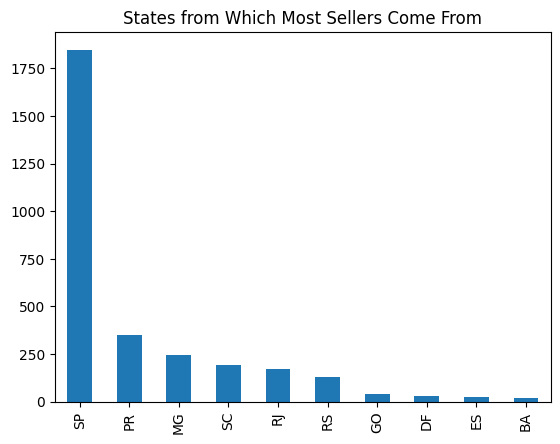

In [11]:
#find values with top 10 occurrences in 'seller_state'
top_10 = (sellers_df['seller_state'].value_counts()).iloc[:10]

#create bar chart to visualize top 10 values
top_10.plot(kind='bar', title = 'States from Which Most Sellers Come From')

<Axes: title={'center': 'Cities from Which Most Sellers Come From'}>

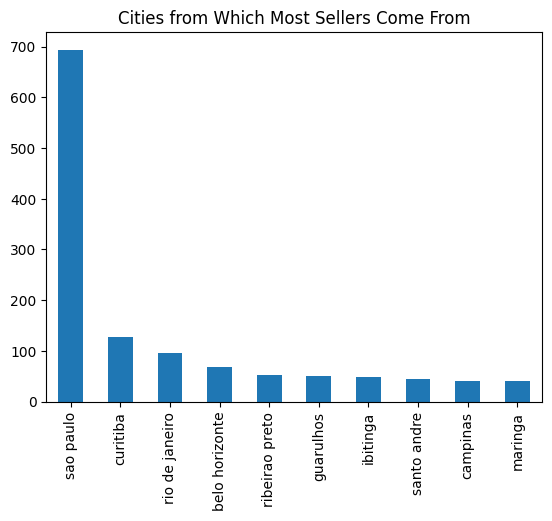

In [18]:
#find values with top 10 occurrences in 'seller_state'
top_10 = (sellers_df['seller_city'].value_counts()).iloc[:10]

#create bar chart to visualize top 10 values
top_10.plot(kind='bar', title = 'Cities from Which Most Sellers Come From')

An overwhelming majority of the sellers came from Sao Paulo

In [16]:
#lets merge sellers_df with orders_items df to determine trend over the years
wauzaji_df = pd.merge(sellers_df,order_items_df,on='seller_id')
wauzaji_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [19]:
#lets check the data types
wauzaji_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   seller_id               112650 non-null  object 
 1   seller_zip_code_prefix  112650 non-null  int64  
 2   seller_city             112650 non-null  object 
 3   seller_state            112650 non-null  object 
 4   order_id                112650 non-null  object 
 5   order_item_id           112650 non-null  int64  
 6   product_id              112650 non-null  object 
 7   shipping_limit_date     112650 non-null  object 
 8   price                   112650 non-null  float64
 9   freight_value           112650 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 9.5+ MB


In [23]:
#we need to change the shipping_limit_date to datetiem format
wauzaji_df['Date'] = pd.to_datetime(wauzaji_df['shipping_limit_date'])
wauzaji_df['Year'] = wauzaji_df['Date'].dt.year
wauzaji_df['Month'] = wauzaji_df['Date'].dt.month
wauzaji_df['DayOfWeek']  = wauzaji_df['Date'].dt.day_name()

In [25]:
wauzaji_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   seller_id               112650 non-null  object        
 1   seller_zip_code_prefix  112650 non-null  int64         
 2   seller_city             112650 non-null  object        
 3   seller_state            112650 non-null  object        
 4   order_id                112650 non-null  object        
 5   order_item_id           112650 non-null  int64         
 6   product_id              112650 non-null  object        
 7   shipping_limit_date     112650 non-null  object        
 8   price                   112650 non-null  float64       
 9   freight_value           112650 non-null  float64       
 10  Date                    112650 non-null  datetime64[ns]
 11  Year                    112650 non-null  int64         
 12  Month                   112650

In [29]:
number_of_sellers_per_year = pd.DataFrame(wauzaji_df.groupby([wauzaji_df.Date.dt.year])['seller_id'].count())
number_of_sellers_per_year

,seller_id
Date,
2016,370
2017,49765
2018,62511
2020,4


2018 recorded the highest number of sellers per year

<Axes: title={'center': 'Number of Sellers Per Year'}, xlabel='Date'>

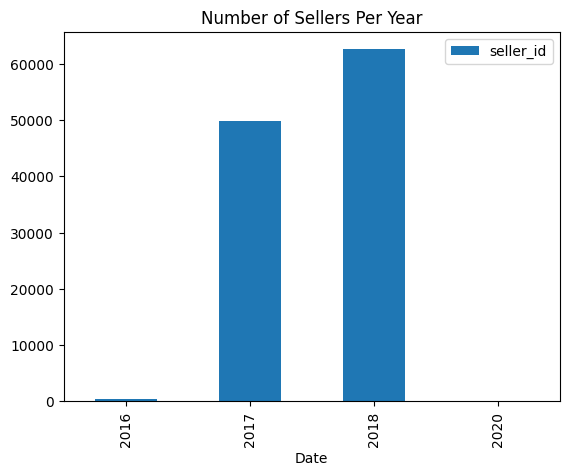

In [30]:
changes.plot(kind = 'bar', title = 'Number of Sellers Per Year')

In [43]:
#istribution_of_Sellers_Per_Month = wauzaji_df[['Month','Year','seller_id']]
#Distribution_of_Sellers_Per_Month = pd.DataFrame(Months_of_the_Year.groupby(['Year','Month'])['seller_id'].count())
#Distribution_of_Sellers_Per_Month.sort_values(by=['Year','Month','seller_id']).sort_index()
Months_of_the_Year = wauzaji_df[['Month','Year','seller_id']]
Months_of_the_Year = pd.DataFrame(Months_of_the_Year.groupby(['Year','Month'])['seller_id'].count())
Months_of_the_Year.sort_values(by=['Year','Month','seller_id'])

seller_id
Year Month           
2016 9              4
     10           365
     12             1
2017 1            681
     2           1866
     3           2751
     4           2364
     5           4150
     6           3801
     7           4116
     8           5042
     9           4724
     10          5189
     11          7355
     12          7726
2018 1           7492
     2           7375
     3           8759
     4           7637
     5           8765
     6           6897
     7           6672
     8           8815
     9             99
2020 2              2
     4              2

<Axes: title={'center': 'Distribution of Sellers Per Month'}, xlabel='Year,Month'>

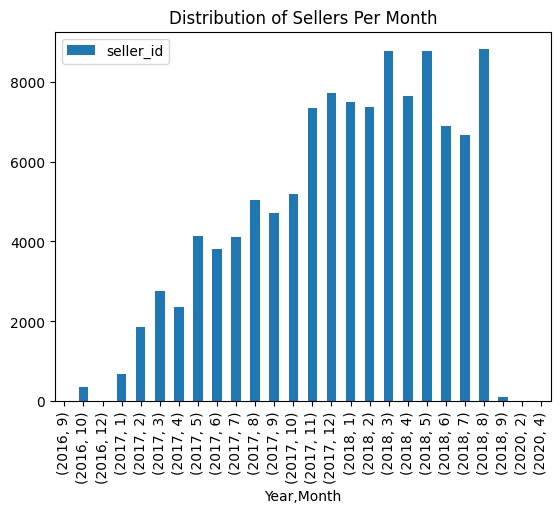

In [44]:
Months_of_the_Year.plot(kind='bar', title = 'Distribution of Sellers Per Month')
#Distribution_of_Sellers_Per_Month.plot(kind='bar', )

There was a steady increase of sellers in the country until Augusr when there was a sharp decrease, the reason for this should be investigated. March, May and August, 2018 recorded the highest number of sellers

What is the distribution of seller ratings on Olist, and how does this impact sales
performance?

In [9]:
#lets review the reviews_df
reviews_df.head(5)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
reviews = reviews_df['review_score'].value_counts()

df_reviews = pd.DataFrame(reviews)

df_result = df_reviews.reset_index()  

df_result.columns = ['review_score', 'Total']

print(df_result)

   review_score  Total
0             5  57420
1             4  19200
2             1  11858
3             3   8287
4             2   3235


Most sellers got  a 5 score

In [11]:
#graphical representation

fig = px.pie(df_result,
             values='Total',
             names='review_score')

fig.show()

In [12]:
#lets review the payments_df
payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [13]:
#lets merge the payments and reviews table
paymentreviews_df = pd.merge(payments_df,reviews_df,on='order_id')
paymentreviews_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1,2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5,2017-12-21 00:00:00,2017-12-22 01:10:39


In [32]:
result = paymentreviews_df.groupby('review_score').aggregate({'order_id':'count','payment_value': 'sum'})
print(result)

              order_id  payment_value
review_score                         
1                12425     2324144.38
2                 3420      556814.29
3                 8655     1255747.26
4                20066     2975117.33
5                59919     8971043.09


In [33]:
result2 = paymentreviews_df.groupby('review_score').aggregate({'payment_value': 'sum'})
print(result2)

              payment_value
review_score               
1                2324144.38
2                 556814.29
3                1255747.26
4                2975117.33
5                8971043.09


Most payment came from orders that had been rated 5. Therefore, the higher the review_score, the more it will pay.

In [49]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [50]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


 ***How many customers have made repeat purchases on Olist, and what percentage of total
sales do they account for? ***


In [51]:
#to see how revenues change over time we need to merge payments_df with orders_df
kastama_df = pd.merge(order_items_df,orders_df,on='order_id')
kastama_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [60]:
#we first have to filter out only those where the orders were actually delivered
mteja_df = kastama_df[(kastama_df['order_status'] == 'delivered')] 
mteja_df.head(3) 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00


In [61]:
mteja_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   order_item_id                  110197 non-null  int64  
 2   product_id                     110197 non-null  object 
 3   seller_id                      110197 non-null  object 
 4   shipping_limit_date            110197 non-null  object 
 5   price                          110197 non-null  float64
 6   freight_value                  110197 non-null  float64
 7   customer_id                    110197 non-null  object 
 8   order_status                   110197 non-null  object 
 9   order_purchase_timestamp       110197 non-null  object 
 10  order_approved_at              110182 non-null  object 
 11  order_delivered_carrier_date   110195 non-null  object 
 12  order_delivered_customer_date 

In [62]:
customers_df = mteja_df.assign(Occurence=np.where(~mteja_df['customer_id'].duplicated(),'New','Existing'))

In [63]:
customers_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Occurence
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,New
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,New
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,New
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,New
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,New


In [64]:
customer_df2 = len(customers_df[customers_df["Occurence"]=="New"])

In [65]:
print(customer_df2)

96478


In [66]:
customer_df3 = len(customers_df[customers_df["Occurence"]=="Existing"])
print(customer_df3)

13719


In [70]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   order_item_id                  110197 non-null  int64  
 2   product_id                     110197 non-null  object 
 3   seller_id                      110197 non-null  object 
 4   shipping_limit_date            110197 non-null  object 
 5   price                          110197 non-null  float64
 6   freight_value                  110197 non-null  float64
 7   customer_id                    110197 non-null  object 
 8   order_status                   110197 non-null  object 
 9   order_purchase_timestamp       110197 non-null  object 
 10  order_approved_at              110182 non-null  object 
 11  order_delivered_carrier_date   110195 non-null  object 
 12  order_delivered_customer_date 

In [74]:
total_sum_by_existing = customers_df.groupby('Occurence').aggregate({'price': 'sum'})
print(total_sum_by_existing)

                 price
Occurence             
Existing    1134701.86
New        12086796.25


In [75]:
print((1134701.86/(1134701.86+12986796.25))*100)

8.035279622326135


Most sales (92%) of sales were attributed to new customers

In [67]:
print((13719/110197)*100)

12.449522219298165


12.5% of the customers were repeat customers

**What is the average order cancellation rate on Olist, and how does this impact seller
performance?**

In [78]:
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [79]:
series = orders_df['order_status'].value_counts()

df_new = pd.DataFrame(series)

df_new = df_new.reset_index()  

df_new.columns = ['order_status', 'Total']

print(df_new)

  order_status  Total
0    delivered  96478
1      shipped   1107
2     canceled    625
3  unavailable    609
4     invoiced    314
5   processing    301
6      created      5
7     approved      2


In [80]:
Average_Cancellation_Rate = (625/(96478+1107+625+609+314+301+7)*100) 
print(Average_Cancellation_Rate)

0.6285133898492574


0.6% of the orders placed were cancelled

In [93]:
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [91]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [95]:
combi_df = pd.merge(sellers_df,order_items_df,on='seller_id')
combi_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [ ]:
total_sum_by_existing = combi_df.groupby('seller_id').aggregate({'seller_id': 'count', ''})
print(total_sum_by_existing)

**Which payment methods are most commonly used by Olist customers, and how does this
vary by product category or geographic region?**

In [41]:
payments_df.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [42]:
def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = payments_df[x].value_counts().index, y = payments_df[x].value_counts(), color = payments_df[x].value_counts().index, height = 600)
  fig.show()

In [43]:
barplot_visualization("payment_type")

Most people pay by credit cards

In [49]:
sellers_df.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [47]:
order_items_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [50]:
#to see how revenues change over time we need to merge payments_df with orders_df
credit_df = pd.merge(payments_df,order_items_df,on='order_id')
credit_df.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.8,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.0,7.39


In [52]:
credit_df = pd.merge(credit_df,sellers_df,on='seller_id')
credit_df.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,13321,salto,SP
1,5308fdab519f7478ef64894128fbbee4,1,credit_card,1,36.07,1,1b93af229a5768eaaed2064722b1c1dc,213b25e6f54661939f11710a6fddb871,2018-06-11 12:11:27,129.95,18.79,13321,salto,SP


In [ ]:
Month_Distribution = wauzaji_df[['Month','Year','seller_id']]
Month_Distribution = pd.DataFrame(Month_Distribution.groupby(['Year','Month'])['seller_id'].count())
Month_Distribution.sort_values(by=['Year','Month','seller_id'])

In [64]:
result = credit_df.groupby('payment_type').aggregate({'order_id':'count','payment_value': 'sum'})
print(result)

              order_id  payment_value
payment_type                         
boleto           22867     4059699.60
credit_card      86769    15589028.22
debit_card        1691      253533.86
voucher           6274      405873.03


In [76]:
result = credit_df.groupby(['seller_state', 'payment_type'])['order_id'].count()
print(result)

seller_state  payment_type
AC            credit_card         1
AM            credit_card         3
BA            boleto            103
              credit_card       534
              debit_card         11
                              ...  
SE            credit_card         8
SP            boleto          16384
              credit_card     61684
              debit_card       1254
              voucher          4532
Name: order_id, Length: 75, dtype: int64


In [ ]:
_coun